# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 9383 Мосин Константин, Нистратов Дмитрий и Соседков Кирилл. Вариант №6

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). 

## Основные теоретические положения

### Дискретное преобразование Фурье

$$S(k) = \sum_{n=0}^{N-1}s(n)e^{-i\frac{2\pi}{N}nk}$$

### Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка

$$\hat y_n = \frac {y_{n+1} - y_{n-1}}{2} $$

Принимая $ s_n = e^{i\omega n}$ и $ y_n = H(\omega)e^{i\omega n}$ получим:

$$H(\omega) = \frac {e^{iw} - e^{-iw}}{2} $$



#### Формула трапеций

$$ y_{n+1} = y_n + \frac {1}{2} (s_n + s_{n+1}), y_0 = 0 $$


Принимая $ s_n = e^{i\omega n}$ и $ y_n = H(\omega)e^{i\omega n}$ получим:

$$ H(\omega) = \frac {e^{i\omega} + 1}{2(e^{i\omega} - 1)} = \frac {cos(\frac {\omega}{2})}{2isin(\frac {\omega}{2})}$$



#### Формула прямоугольников

$$ y_{n+1} = y_n + s_{n + \frac {1}{2}}, y_0 = 0 $$

Принимая $ s_n = e^{i\omega n}$ и $ y_n = H(\omega)e^{i\omega n}$ получим:

$$ H(\omega) = \frac {e^{\frac {i\omega}{2}}} {e^{iw}-1}  = \frac {-i}{2sin(\frac{w}{2})}$$




#### Формула Симпсона

$$ y_{n+1} = y_{n-1} + \frac {1}{3}(s_{n-1}+4s_n+s_{n+1}), y_0 = 0 $$

Принимая $ s_n = e^{i\omega n}$ и $ y_n = H(\omega)e^{i\omega n}$ получим:

$$ H(\omega) = \frac {(e^{i\omega(n+1)} +4e^{i\omega n} + e^{i\omega(n-1)})}{3(e^{i\omega(n+1)} - e^{i\omega(n-1)})} = \frac{cos(\omega) + 2}{3isin(\omega)}$$






## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Пункт 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos({\omega}_kt+{\varphi}_k)$.  Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы ${\varphi}_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.

In [2]:
A = np.random.randint(low=1, high=11, size=11)
A = A / sum(A)
w = np.array([i/10 * np.pi for i in range(11)])
phi = np.random.random_sample(11) / 2

def f(t):
    y = 0
    for Ak, wk, phik in zip(A, w, phi):
        y += Ak * np.cos(wk * t + phik)
    return y

#### Пункт 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

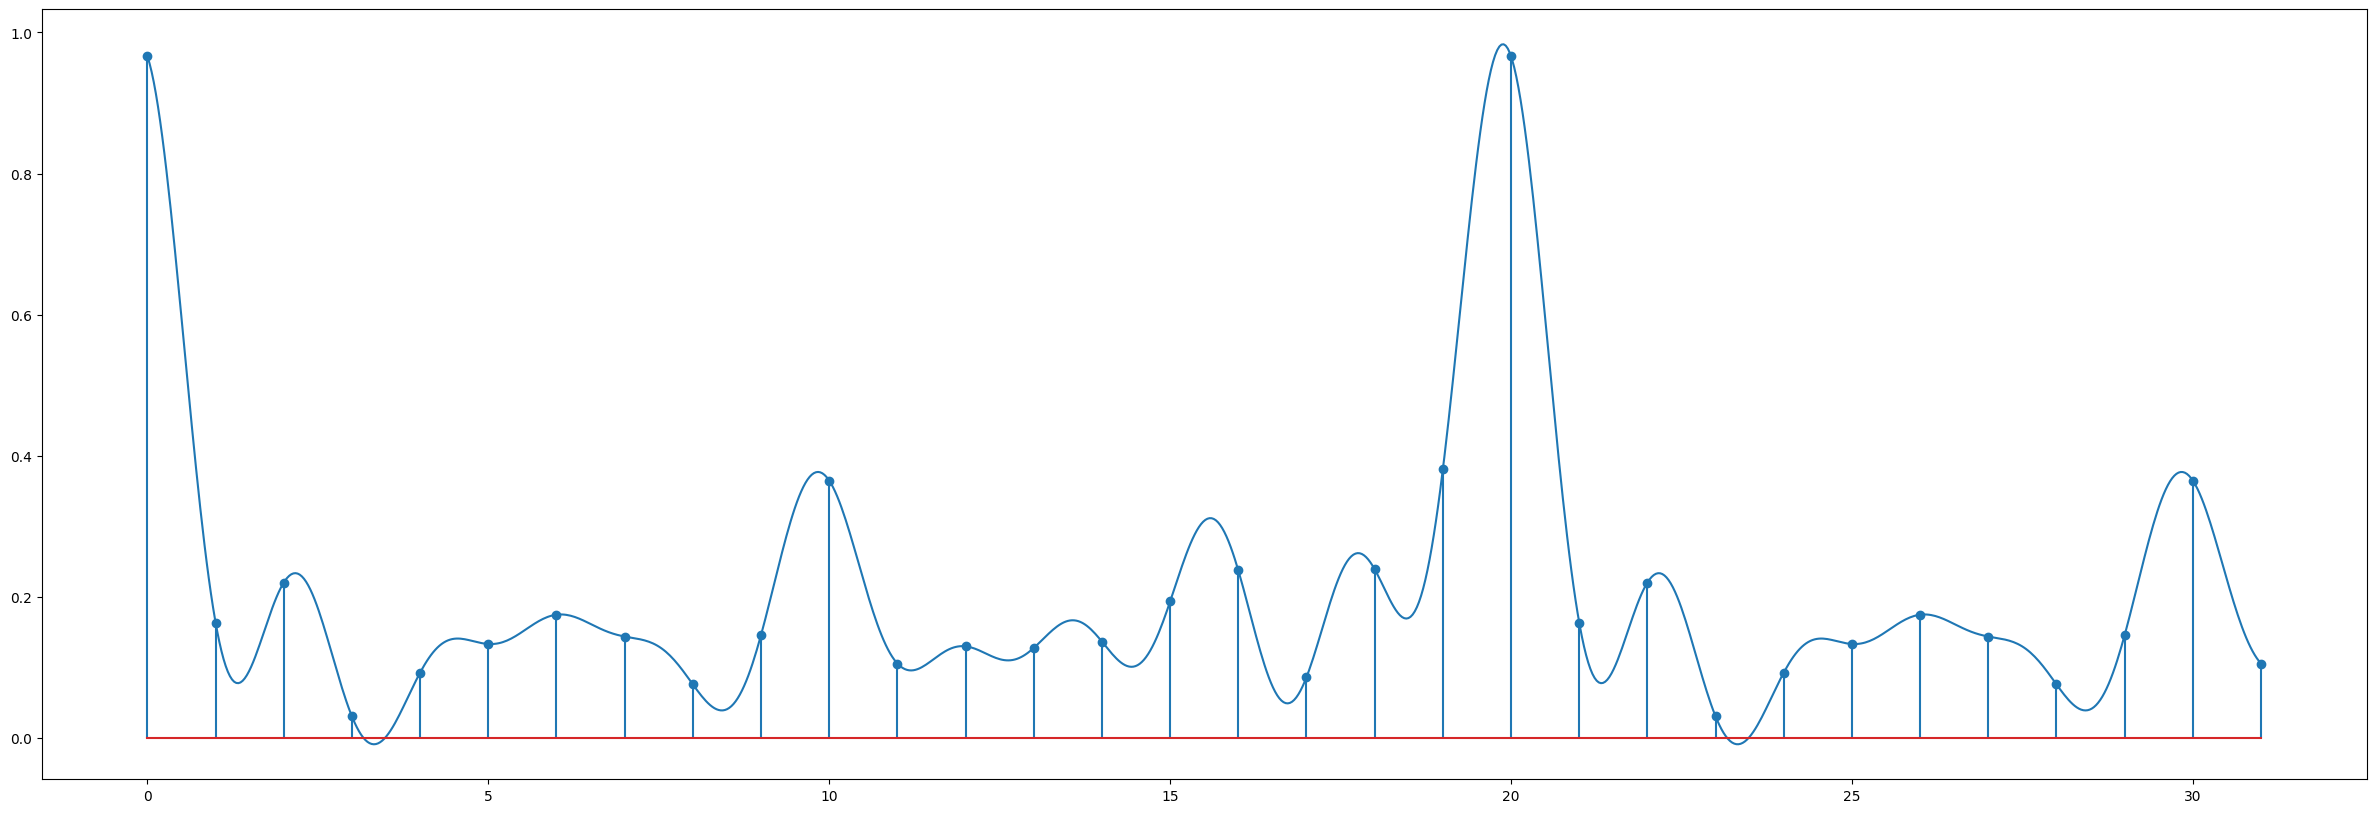

In [3]:
x = np.linspace(0, 31, 1000)
x_ = np.linspace(0, 31, 32)

plt.rcParams['figure.figsize'] = [30, 10]

plt.plot(x, f(x))
plt.stem(x_, f(x_))

plt.show()

#### Пункт 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

In [4]:
def DFT(signal, sampling_rate = 1):
    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    dft_amp = np.dot(e.real, signal)

    N = len(dft_amp)
    n = np.arange(N)
    T = N/sampling_rate
    dft_freq = n/T

    return (dft_freq, dft_amp)

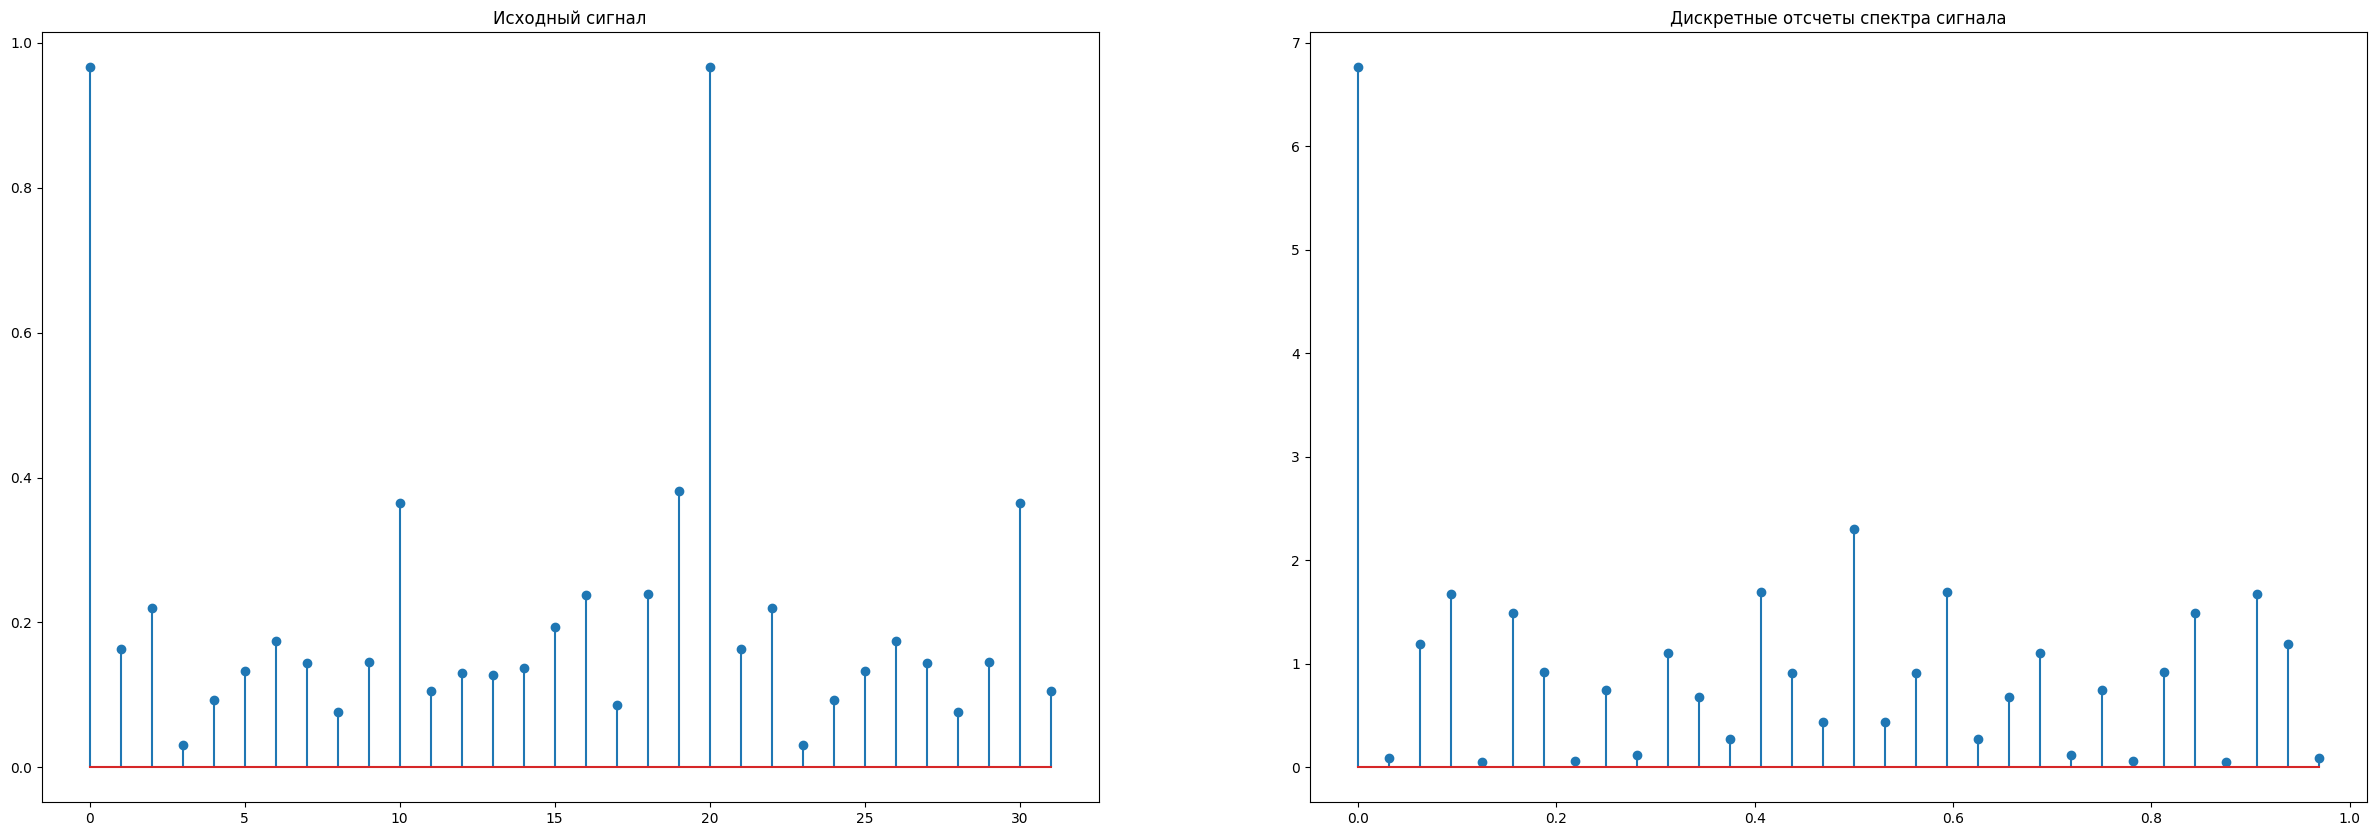

In [5]:
fig, axs = plt.subplots(1, 2)

axs[0].stem(x_, f(x_))
axs[0].set_title('Исходный сигнал')

freq, amp = DFT(f(x_))

axs[1].stem(freq, abs(amp))
axs[1].set_title('Дискретные отсчеты спектра сигнала')

plt.show()

### Пункт 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

In [6]:
linear_smoothing = lambda y, dots: np.convolve(y, np.ones(dots), 'same')/dots

### Пункт 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

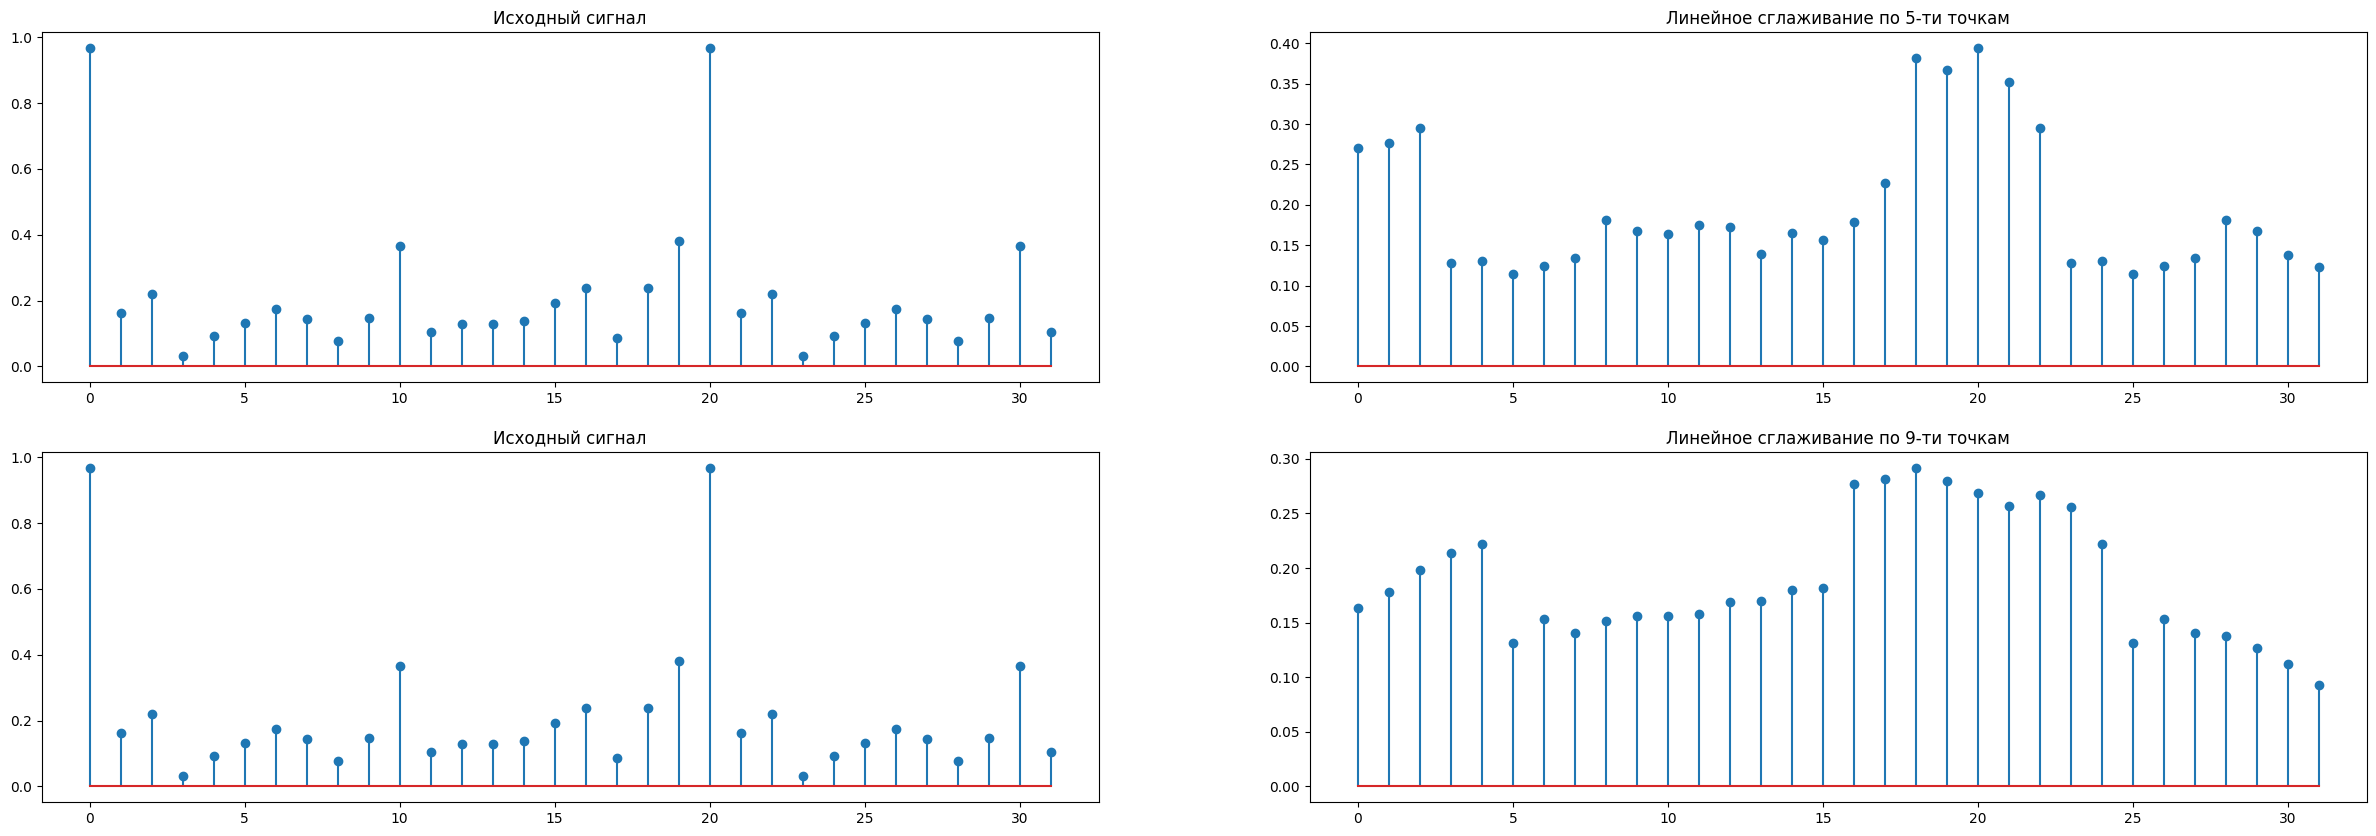

In [7]:
fig, axs = plt.subplots(2, 2)

plt.rcParams['figure.figsize'] = [40, 10]


axs[0][0].stem(x_, f(x_))
axs[0][0].set_title('Исходный сигнал')

axs[0][1].stem(x_, linear_smoothing(f(x_), 5))
axs[0][1].set_title('Линейное сглаживание по 5-ти точкам')

axs[1][0].stem(x_, f(x_))
axs[1][0].set_title('Исходный сигнал')

axs[1][1].stem(x_, linear_smoothing(f(x_), 9))
axs[1][1].set_title('Линейное сглаживание по 9-ти точкам')


plt.show()

#### Пункт 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

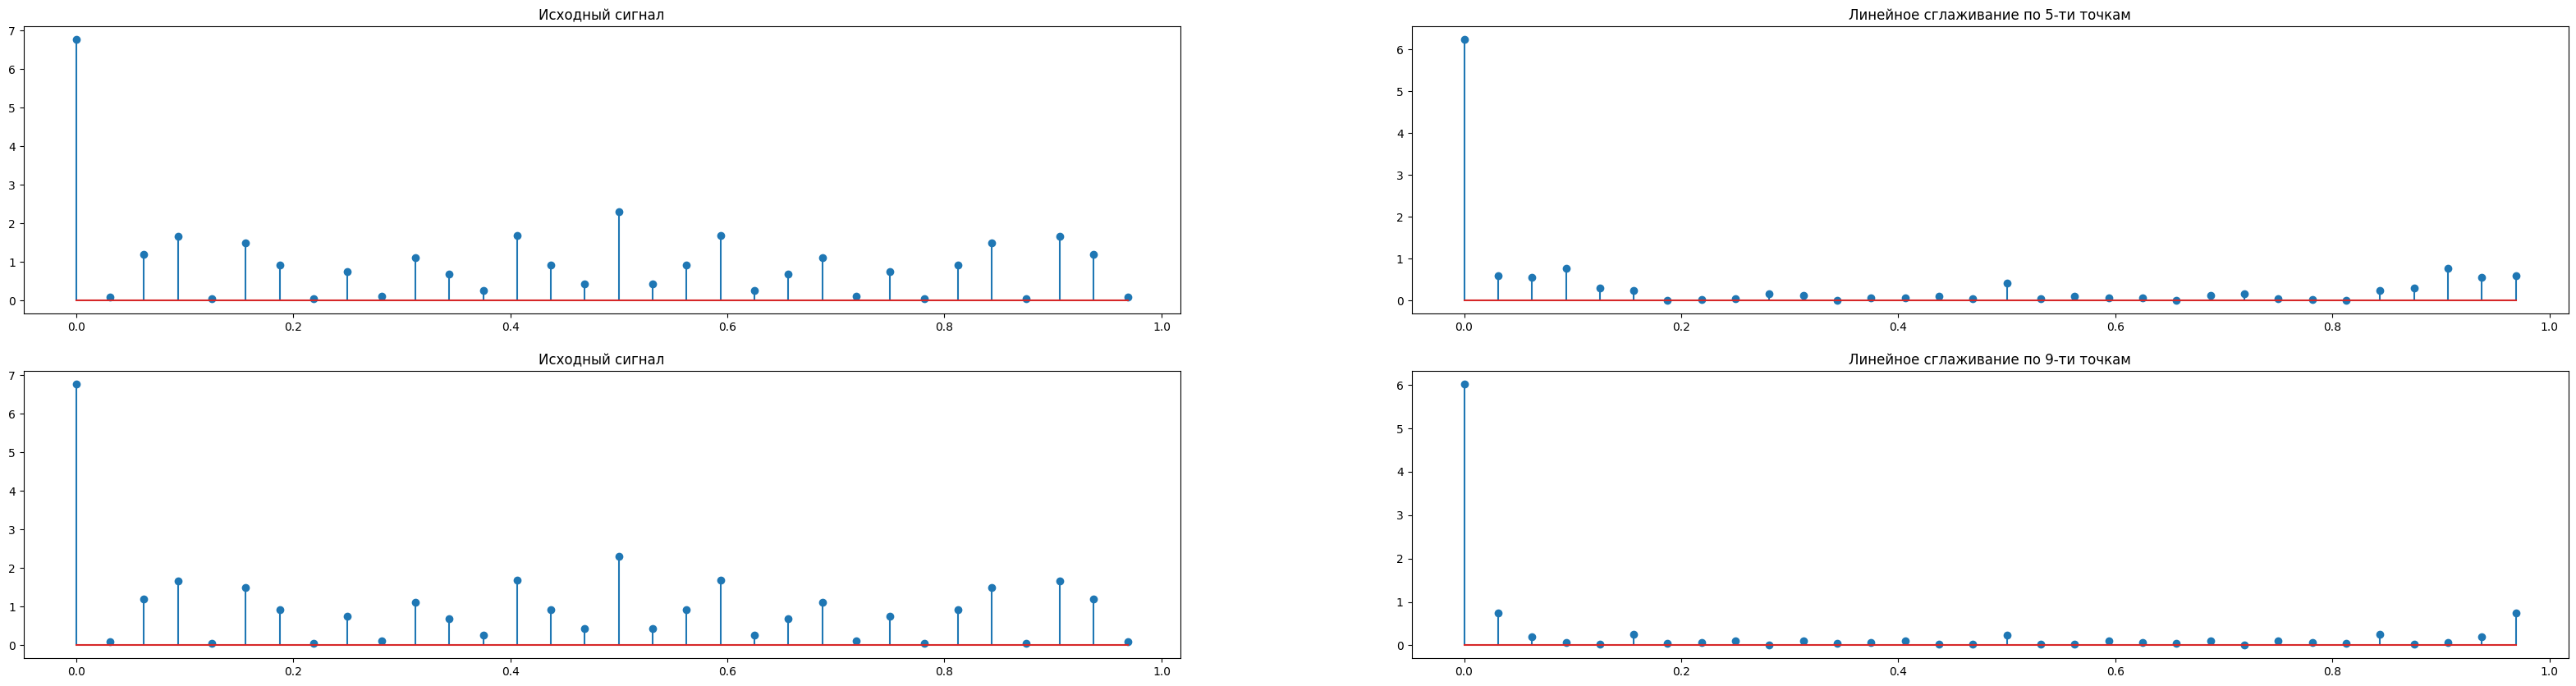

In [8]:
fig, axs = plt.subplots(2, 2)


freq, amp = DFT(f(x_))

axs[0][0].stem(freq, abs(amp))
axs[0][0].set_title('Исходный сигнал')


freq, amp = DFT(linear_smoothing(f(x_), 5))

axs[0][1].stem(freq, abs(amp))
axs[0][1].set_title('Линейное сглаживание по 5-ти точкам')

freq, amp = DFT(f(x_))
axs[1][0].stem(freq, abs(amp))
axs[1][0].set_title('Исходный сигнал')

freq, amp = DFT(linear_smoothing(f(x_), 9))

axs[1][1].stem(freq, abs(amp))
axs[1][1].set_title('Линейное сглаживание по 9-ти точкам')

plt.show()


#### Пункт 7

Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

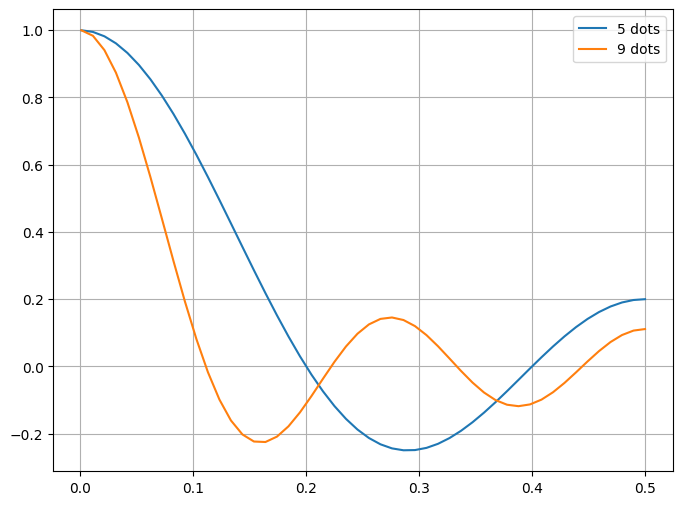

In [21]:
H_w = lambda m, w: (np.sin((2 * m + 1) * w / 2)) / ((2 * m + 1) * np.sin(w / 2))
x = np.linspace(0.001, 0.5)

plt.rcParams['figure.figsize'] = [8, 6]

plt.plot(x, H_w(2, x * 2 * np.pi), label='5 dots') # 2 * 2 + 1 = 5 точек
plt.plot(x, H_w(4, x * 2 * np.pi), label='9 dots') # 9 точек
plt.grid() # сеточка
plt.legend() # легенда
plt.show()

Сравнивая дискретные отсчеты спектра дискретного сигнала после его фильтрации с передаточной функцией, можно сделать следующие выводы:
* тенденция дискретного сигнала после его фильтрации соответствует тенденции передаточной функции
* чем выше частота, тем больше сглажена амплитуда гармоник
* подавление амплитуды больше по 9 точкам, чем по 5

#### Пункт 8

Повторить п. 4–7 для следующих фильтров:


- Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

- Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).


#### Пункт 8.4a

Для дискретного сигнала применить дискретный фильтр, соответствующий численному дифференцированию 1-го порядка., представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

In [9]:
def clamped(index, signal):
    if index < 0: return 0
    if index >= len(signal): return 0
    return signal[index]

def num_diff(signal):
    y = []
    for i in range(0, len(signal)):
        y.append((clamped(i+1, signal) - clamped(i-1, signal))/2)
    return y

#### Пункт 8.5a

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

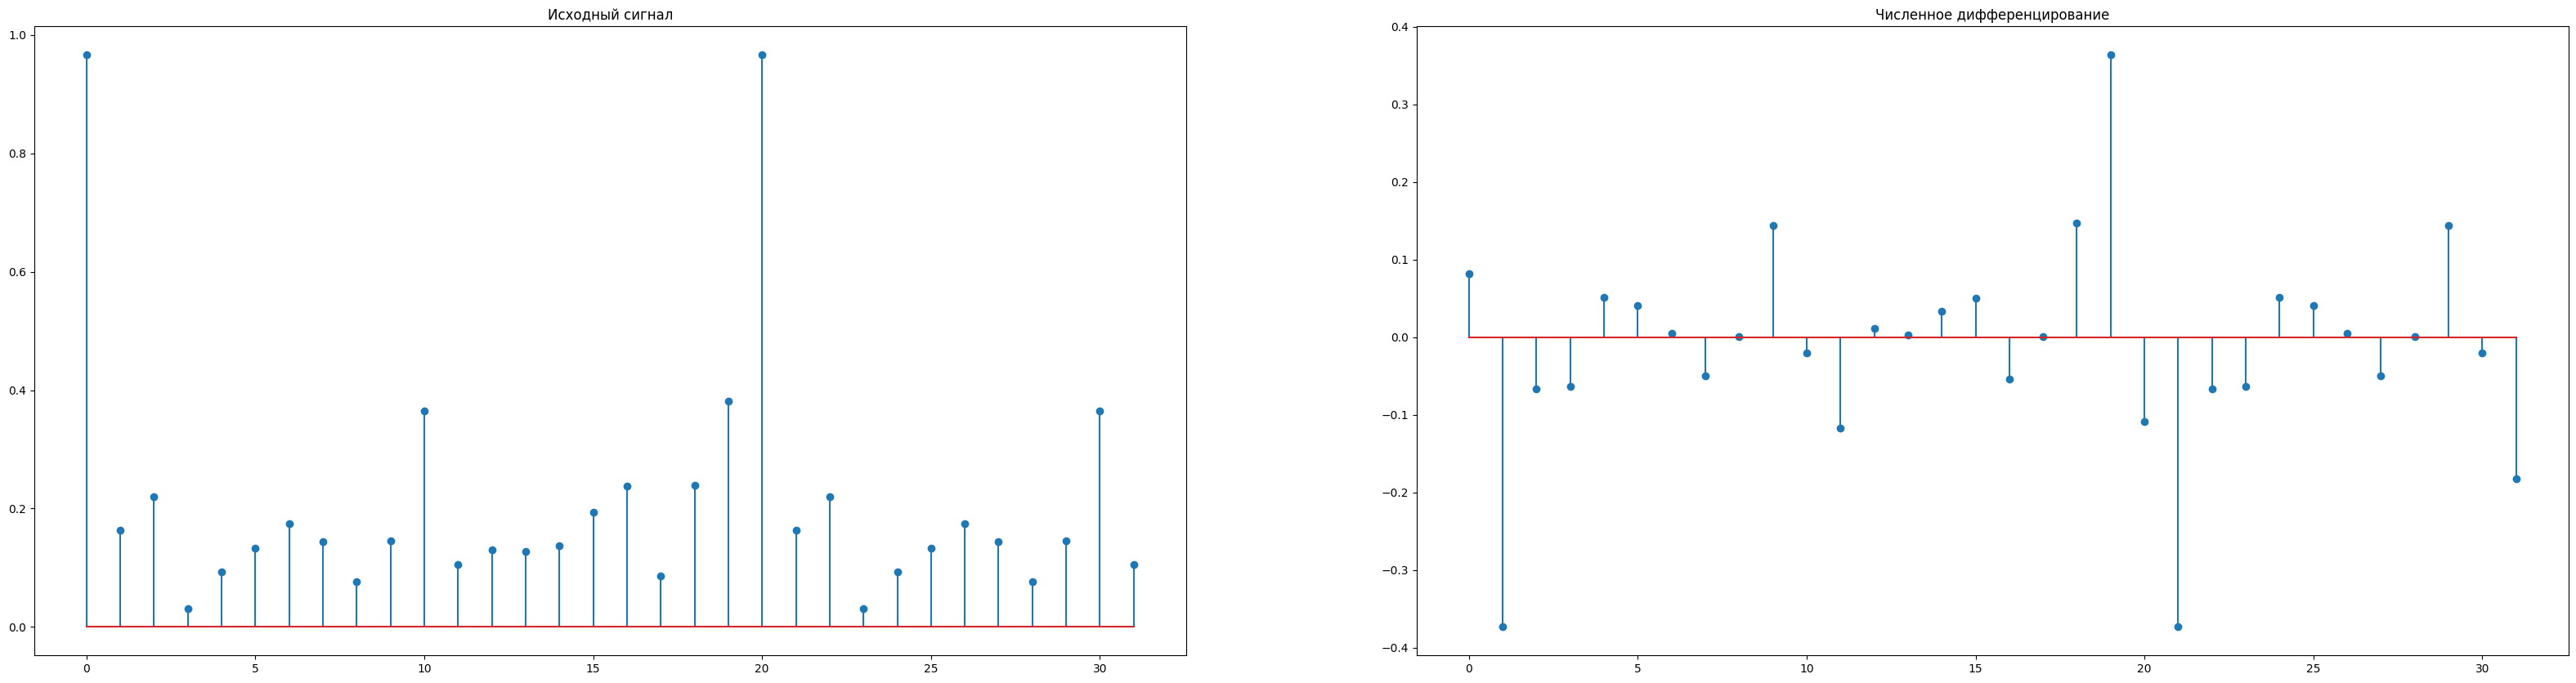

In [10]:
fig, axs = plt.subplots(1, 2)

plt.rcParams['figure.figsize'] = [40, 10]


axs[0].stem(x_, f(x_))
axs[0].set_title('Исходный сигнал')

axs[1].stem(x_, num_diff(f(x_)))
axs[1].set_title('Численное дифференцирование')



plt.show()

#### Пункт 8.6a
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

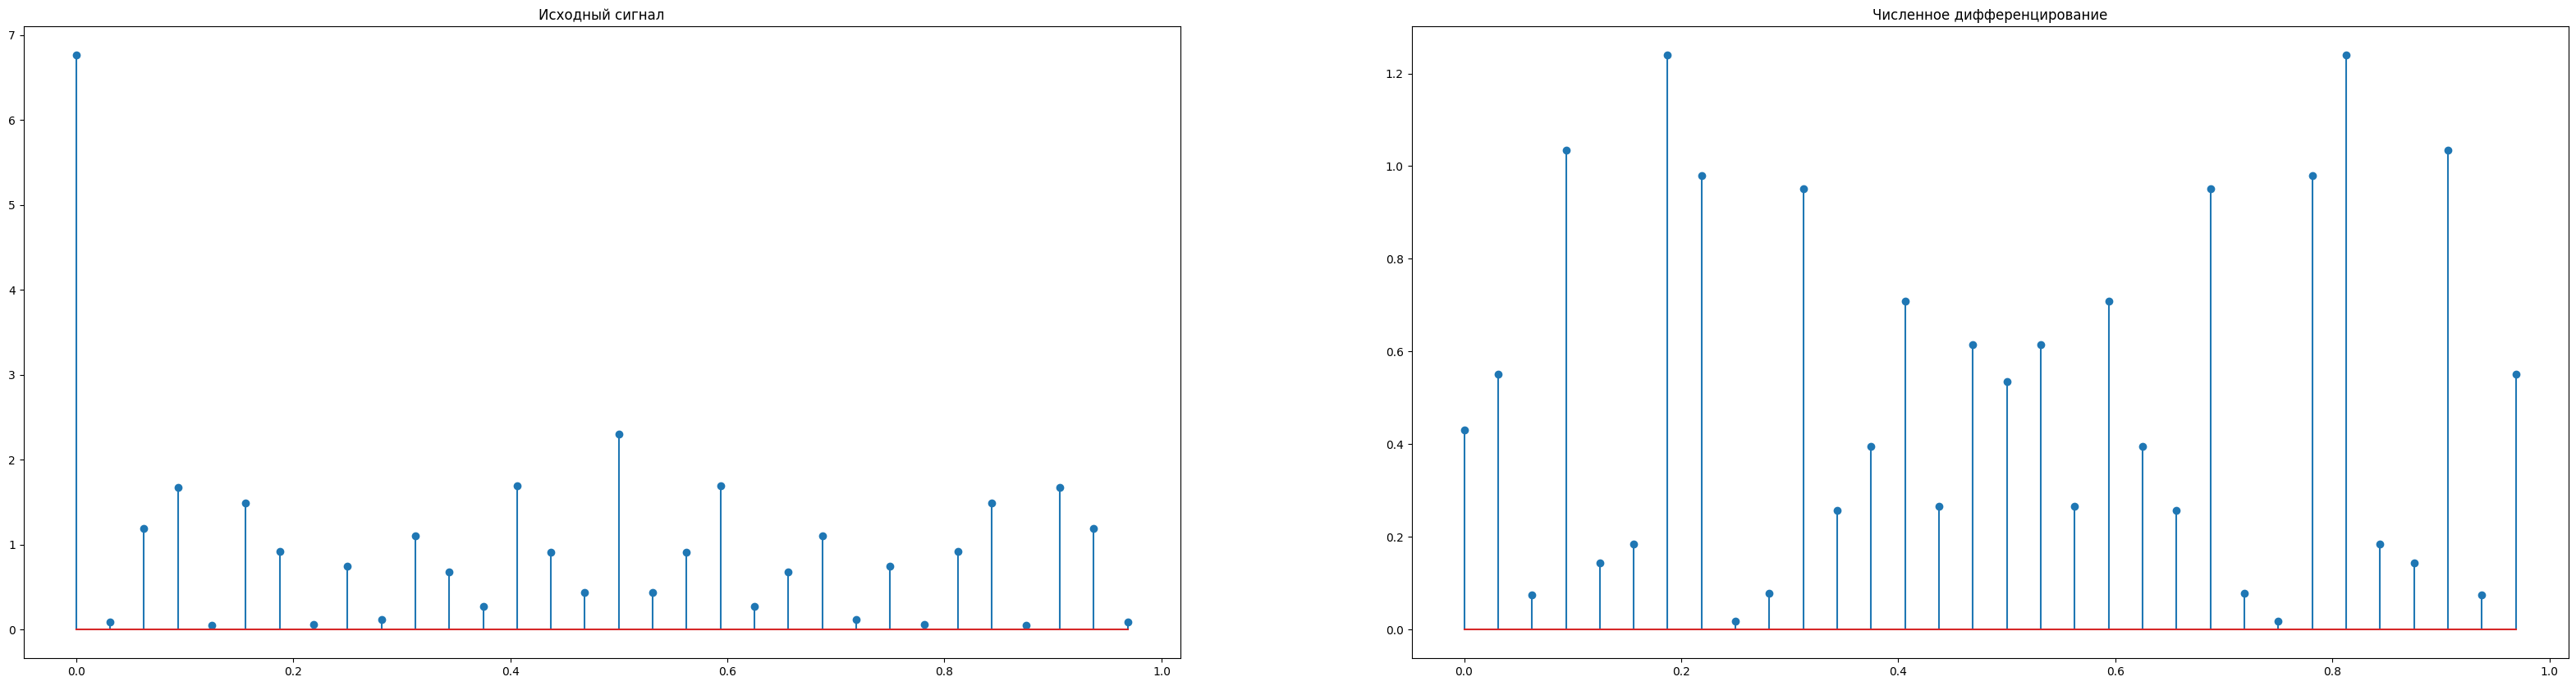

In [11]:
fig, axs = plt.subplots(1, 2)


freq_default, amp_default = DFT(f(x_))

axs[0].stem(freq_default, abs(amp_default))
axs[0].set_title('Исходный сигнал')

freq, amp = DFT(num_diff(f(x_)))

axs[1].stem(freq, abs(amp))
axs[1].set_title('Численное дифференцирование')

plt.show()

#### Пункт 8.7a

Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

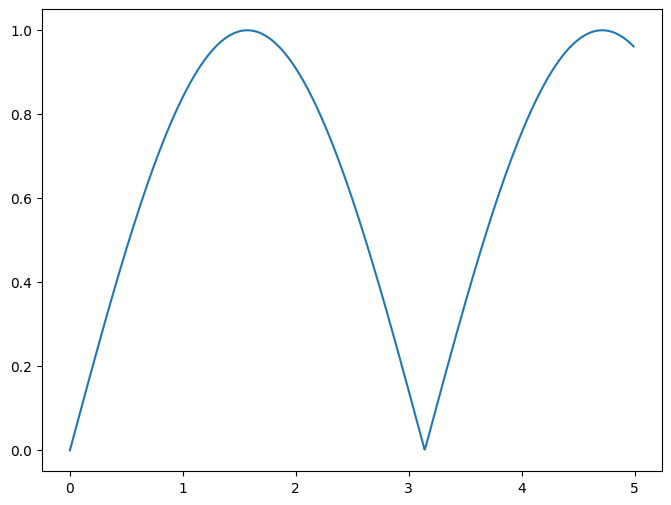

In [22]:
x = np.arange(0, 5, 0.01)

Hw = lambda w: np.abs((np.exp(w*1j) - np.exp(w*-1j))/2)

plt.plot(x, Hw(x))

plt.show()

Передаточная функция соответствует дискретным отсчетам спектра дискретного сигнала после его фильтрации. Низкие и высокие частоты подавляются, средние сглаживаются.

#### Пункт 8.4b

Для дискретного сигнала применить дискретный фильтр соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона). Представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

In [13]:

def rect(signal, n):
    if n <= 0: return 0
    return rect(signal, n-1) + signal(n+1/2)

def trapez(signal, n):
    if n <= 0: return 0
    return trapez(signal, n-1) + 1/2*(signal(n) + signal(n+1))

def simp(signal, n):
    if n <= 0: return 0
    return simp(signal, n-2) + 1/3*(signal(n-1) + 4*signal(n) + signal(n+1))

#### Пункт 8.5b

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

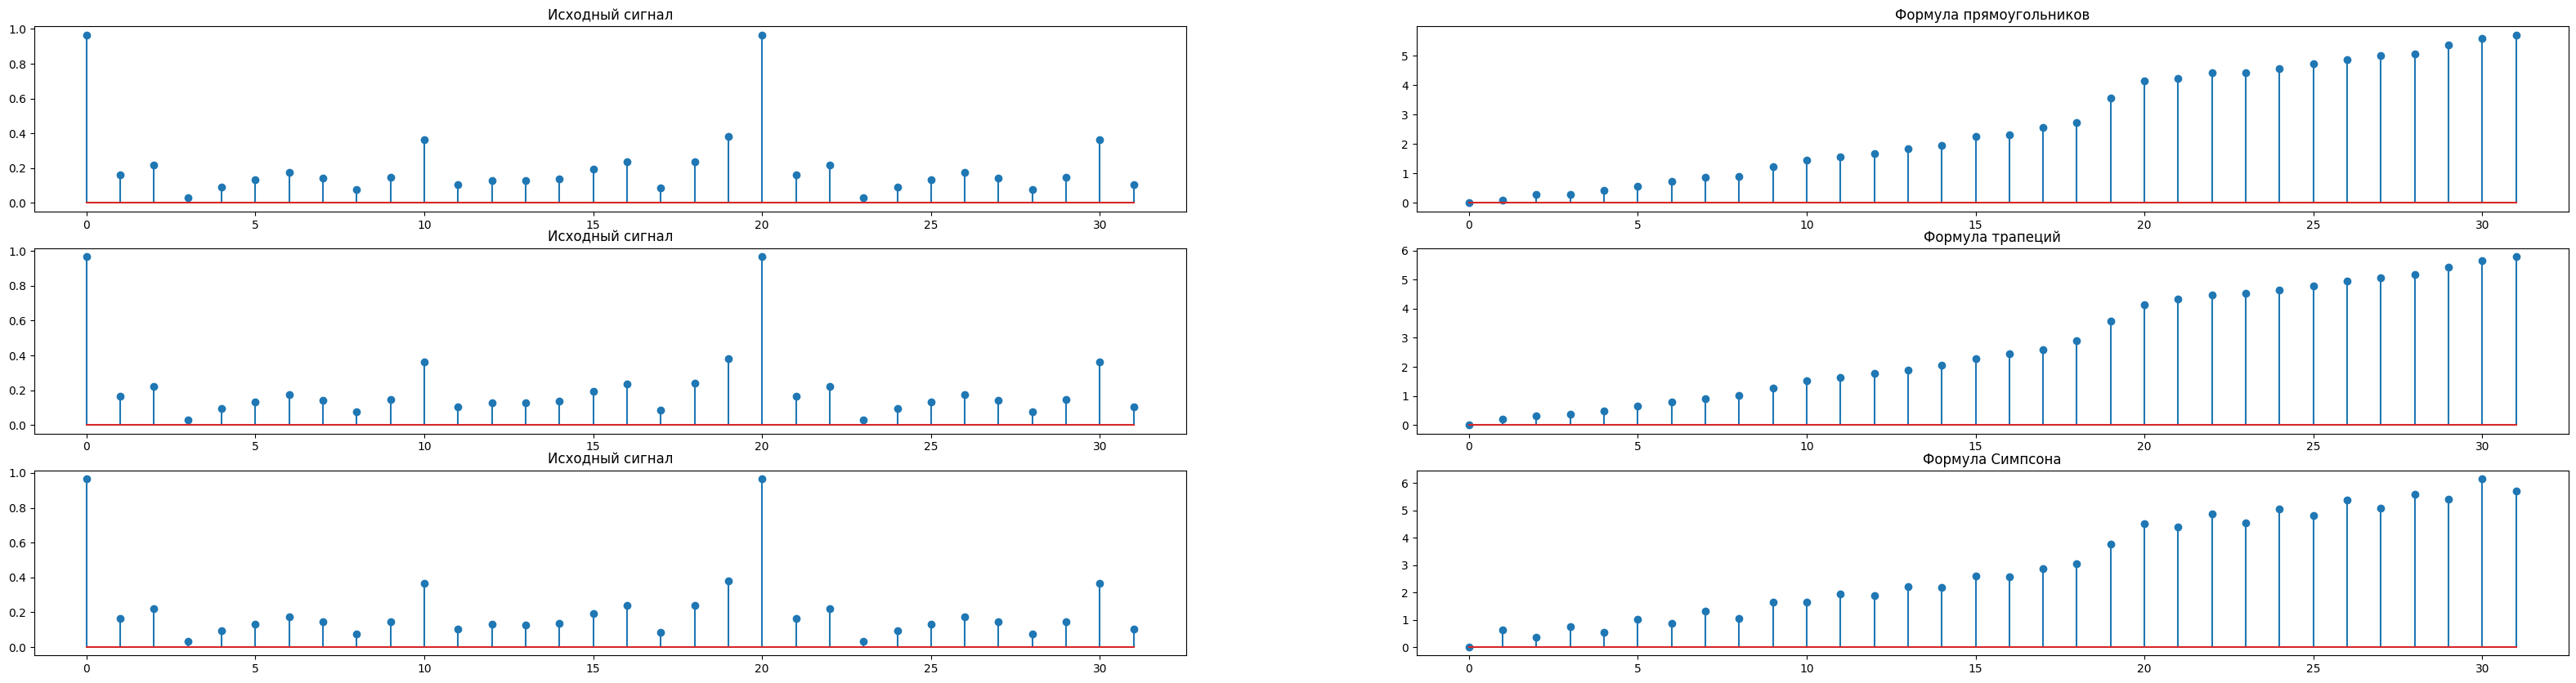

In [14]:
fig, axs = plt.subplots(3, 2)

plt.rcParams['figure.figsize'] = [40, 10]


axs[0][0].stem(x_, f(x_))
axs[0][0].set_title('Исходный сигнал')

y = [rect(f, n) for n in range(len(f(x_)))]

axs[0][1].stem(x_, y)
axs[0][1].set_title('Формула прямоугольников')


axs[1][0].stem(x_, f(x_))
axs[1][0].set_title('Исходный сигнал')

y = [trapez(f, n) for n in range(len(f(x_)))]

axs[1][1].stem(x_, y)
axs[1][1].set_title('Формула трапеций')



axs[2][0].stem(x_, f(x_))
axs[2][0].set_title('Исходный сигнал')

y = [simp(f, n) for n in range(len(f(x_)))]

axs[2][1].stem(x_, y)
axs[2][1].set_title('Формула Симпсона')


plt.show()

#### Пункт 8.6b
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

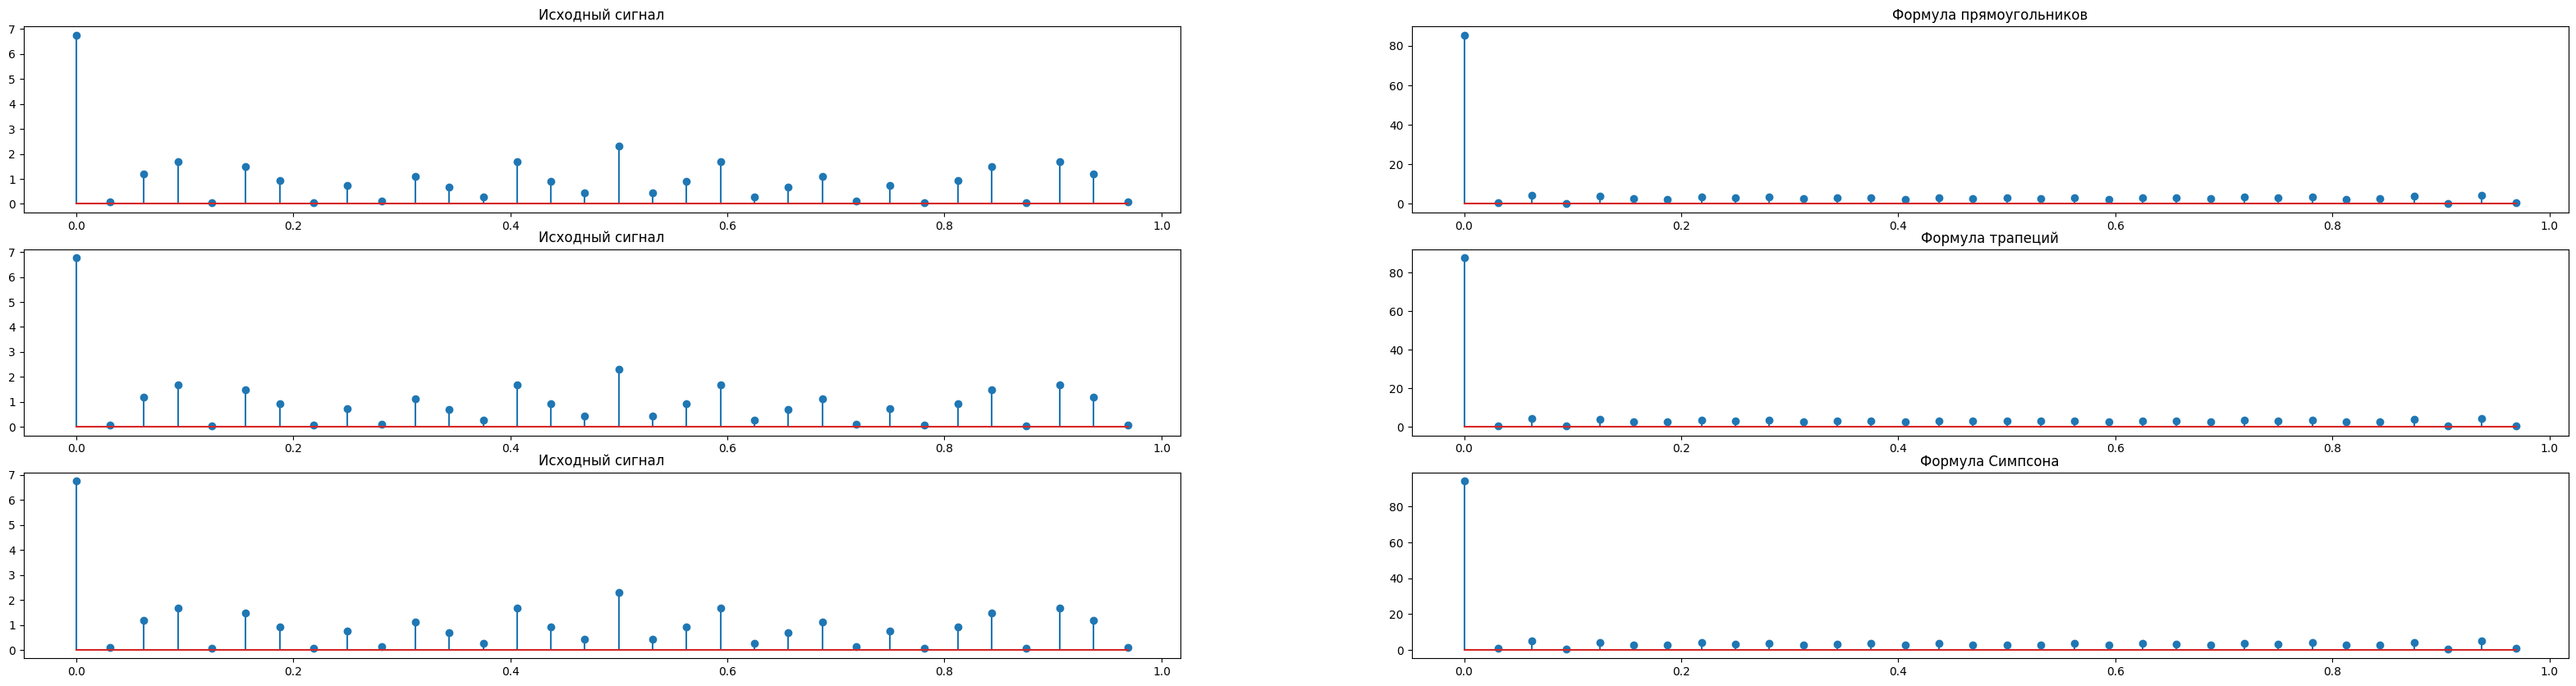

In [15]:
fig, axs = plt.subplots(3, 2)

plt.rcParams['figure.figsize'] = [40, 10]


freq_default, amp_default = DFT(f(x_))

axs[0][0].stem(freq_default, abs(amp_default))
axs[0][0].set_title('Исходный сигнал')

y = [rect(f, n) for n in range(len(f(x_)))]
freq, amp = DFT(y)

axs[0][1].stem(freq, abs(amp))
axs[0][1].set_title('Формула прямоугольников')


axs[1][0].stem(freq_default, abs(amp_default))
axs[1][0].set_title('Исходный сигнал')

y = [trapez(f, n) for n in range(len(f(x_)))]
freq, amp = DFT(y)

axs[1][1].stem(freq, abs(amp))
axs[1][1].set_title('Формула трапеций')



axs[2][0].stem(freq_default, abs(amp_default))
axs[2][0].set_title('Исходный сигнал')

y = [simp(f, n) for n in range(len(f(x_)))]
freq, amp = DFT(y)

axs[2][1].stem(freq, abs(amp))
axs[2][1].set_title('Формула Симпсона')


plt.show()

#### Пункт 8.7b

Проанализировать результат на соответствие значениям H(ω). Сделать выводы.


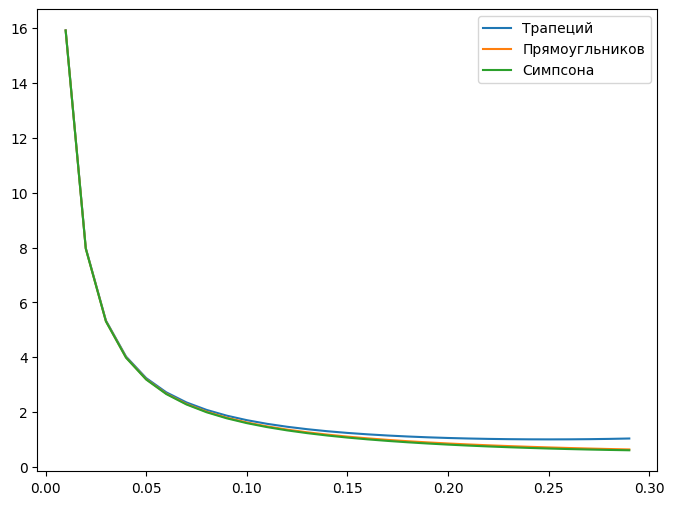

In [28]:
x = np.arange(0.1, 1, 0.01)


f1 = lambda w: 1 / np.abs(np.cos(w/2)*((2j*np.sin(w/2))))
f2 = lambda w: np.abs((-1j)/(2*np.sin(w/2)))
f3 = lambda w: np.abs((2+np.cos(w))/(3*np.sin(w)*1j))

x = np.arange(0.01, 0.3, 0.01)

plt.plot(x, f1(2*x*np.pi), label='Трапеций')
plt.plot(x, f2(2*x*np.pi), label='Прямоугльников')
plt.plot(x, f3(2*x*np.pi), label='Симпсона')
plt.legend() 
plt.show()

Передаточные функции соответствуют полученным результатам дискретных отсчетов спектра дискретного сигнала после фильтрации численным интегрированием. Дискретные фильтры, соответствующие численному интегрированию усиливают частоты. Для низких частот усиление существенное.

## Выводы

В ходе выполнения лабораторной работы был сформирован дискретный сигнал посредством дискретизации аналогового сигнала. Дискретный сигнал был отфильтрован с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования. К отфильтрованным сигналам применялся ДПФ для поиска дискретных отсчетов спектра дискретного сигнала. Полученные данные сравнивались с соответственными значениями передаточных функций.